# Getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"], index_col = "Date")
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   36168 non-null  float64
 1   Volume  36168 non-null  float64
dtypes: float64(2)
memory usage: 847.7 KB


In [4]:
data = data[["Close","Volume"]].copy()
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


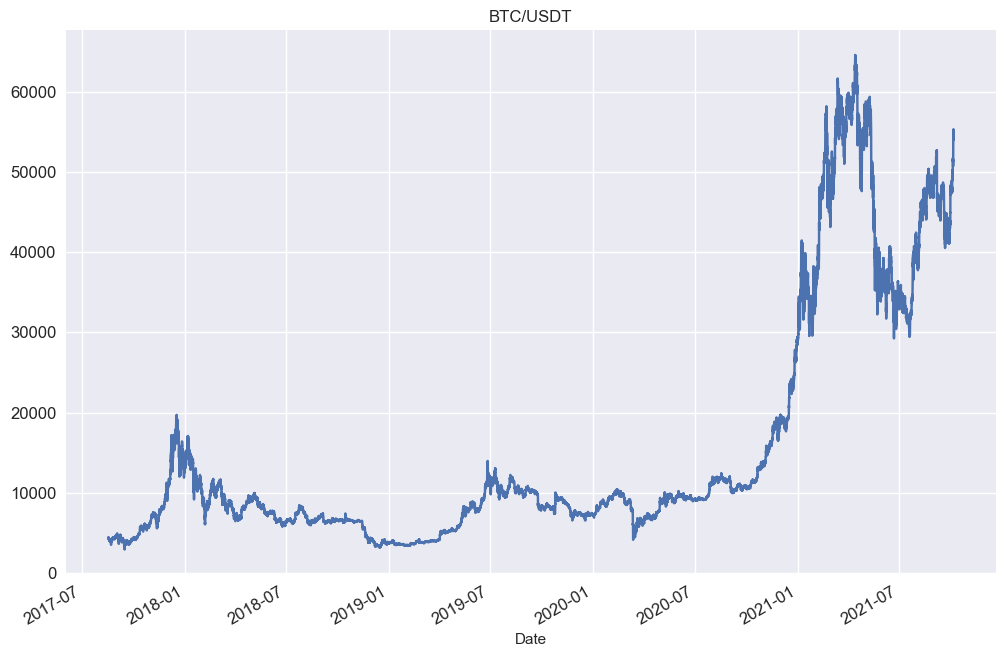

In [5]:
data.Close.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

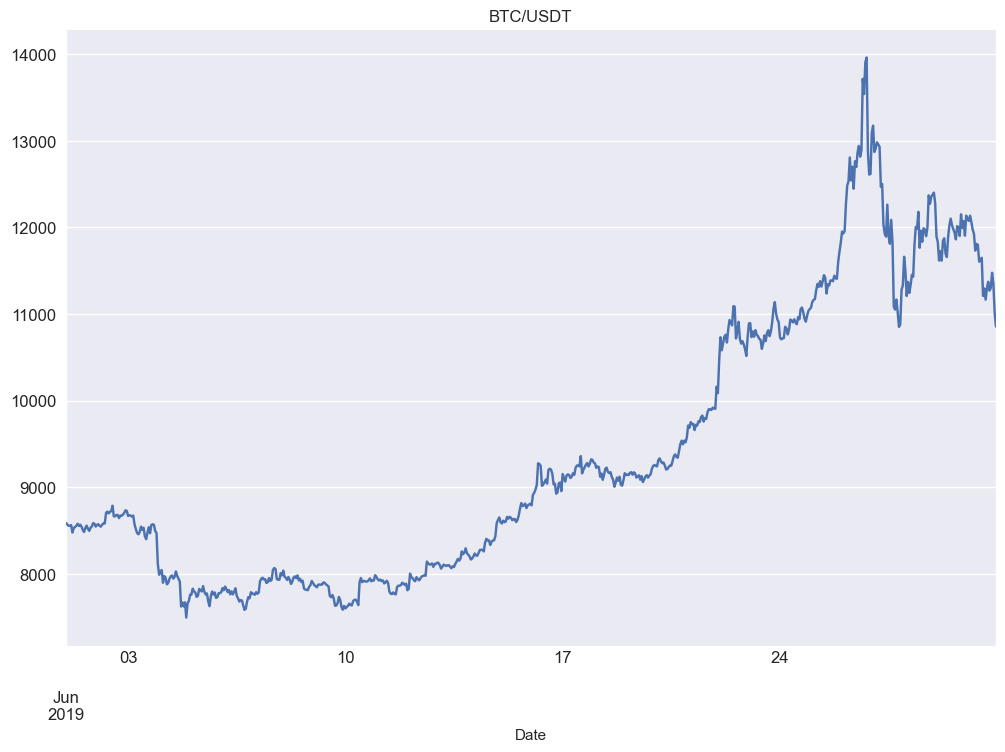

In [7]:
data.Close.loc["2019-06"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

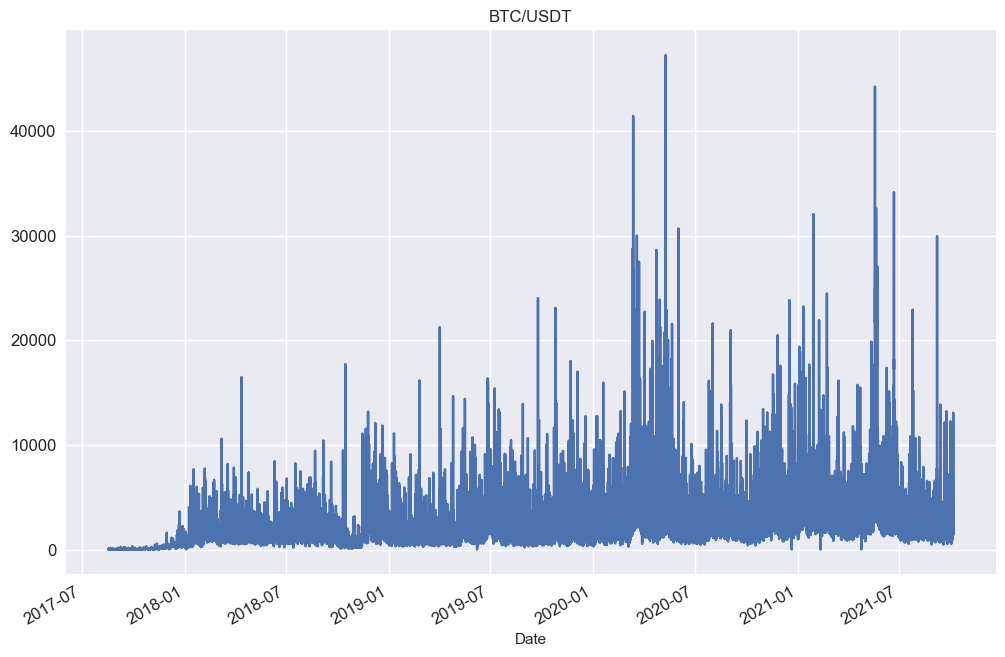

In [10]:
data.Volume.plot(figsize = (12,8), title = "BTC/USDT", fontsize = 12)
plt.show()

<Axes: title={'center': 'BTC/USDT'}, xlabel='Date'>

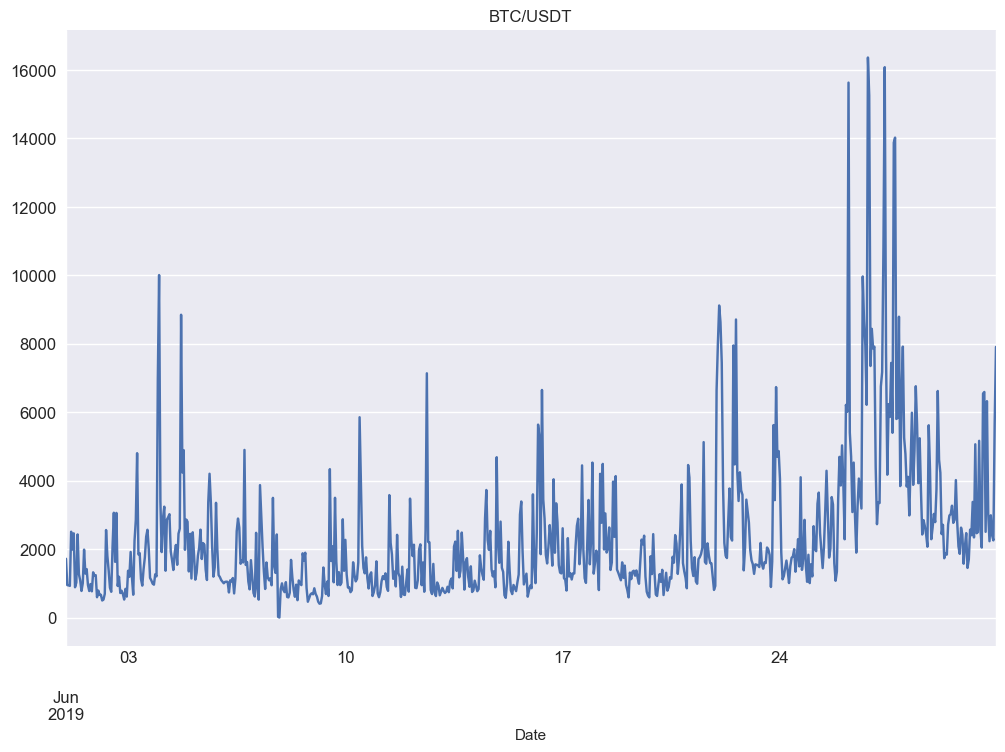

In [11]:
data.Volume.loc["2019-06"].plot(figsize = (12,8), title = "BTC/USDT", fontsize = 12)

In [12]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [13]:
data.describe()

,Close,Volume,returns
count,36168.000000,36168.000000,36167.000000
mean,15211.287479,2121.344201,0.000070
std,14918.059912,2211.660869,0.009669
min,2919.000000,0.000000,-0.201033
25%,6619.987500,910.157520,-0.002955
50%,9110.620000,1551.676864,0.000139
75%,13411.242500,2603.584828,0.003258
max,64577.260000,47255.762685,0.160280


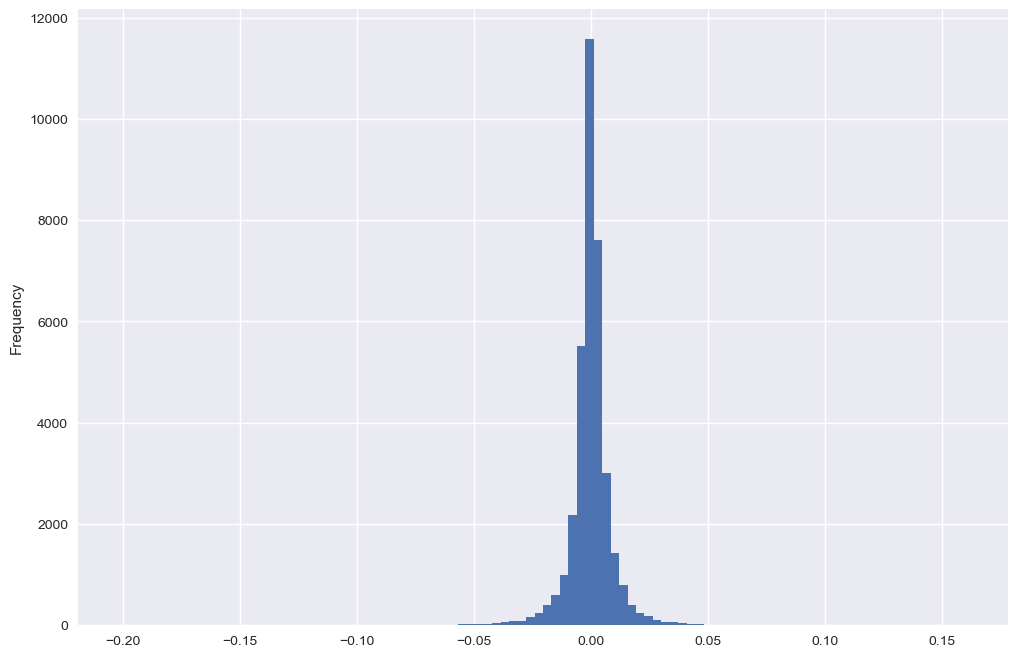

In [14]:
data.returns.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [16]:
data.returns.nlargest(10)

Date
2020-03-13 02:00:00    0.160280
2017-09-15 12:00:00    0.131731
2020-03-15 21:00:00    0.129546
2017-09-15 14:00:00    0.117777
2021-01-29 08:00:00    0.116145
2017-09-05 02:00:00    0.113257
2018-01-17 16:00:00    0.108790
2018-04-12 11:00:00    0.103325
2018-10-15 06:00:00    0.100727
2019-07-18 14:00:00    0.089576
Name: returns, dtype: float64

In [17]:
data.returns.nsmallest(10)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
Name: returns, dtype: float64

# A simple Buy and Hold "Strategy"

In [24]:
data

,Close,Volume,returns
Date,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457
...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54755.92,4163.431360,0.004058


In [25]:
data.Close / data.Close.iloc[0]

Date
2017-08-17 04:00:00     1.000000
2017-08-17 05:00:00     1.001506
2017-08-17 06:00:00     1.003602
2017-08-17 07:00:00     1.009552
2017-08-17 08:00:00     1.012036
                         ...    
2021-10-07 05:00:00    12.703161
2021-10-07 06:00:00    12.656373
2021-10-07 07:00:00    12.707839
2021-10-07 08:00:00    12.657334
2021-10-07 09:00:00    12.531360
Name: Close, Length: 36168, dtype: float64

In [26]:
data.returns.sum()

2.528234304212195

In [27]:
multiple = np.exp(data.returns.sum())
multiple

12.531360021165671

In [28]:
data["creturns"] = data.returns.cumsum().apply(np.exp)

In [29]:
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839


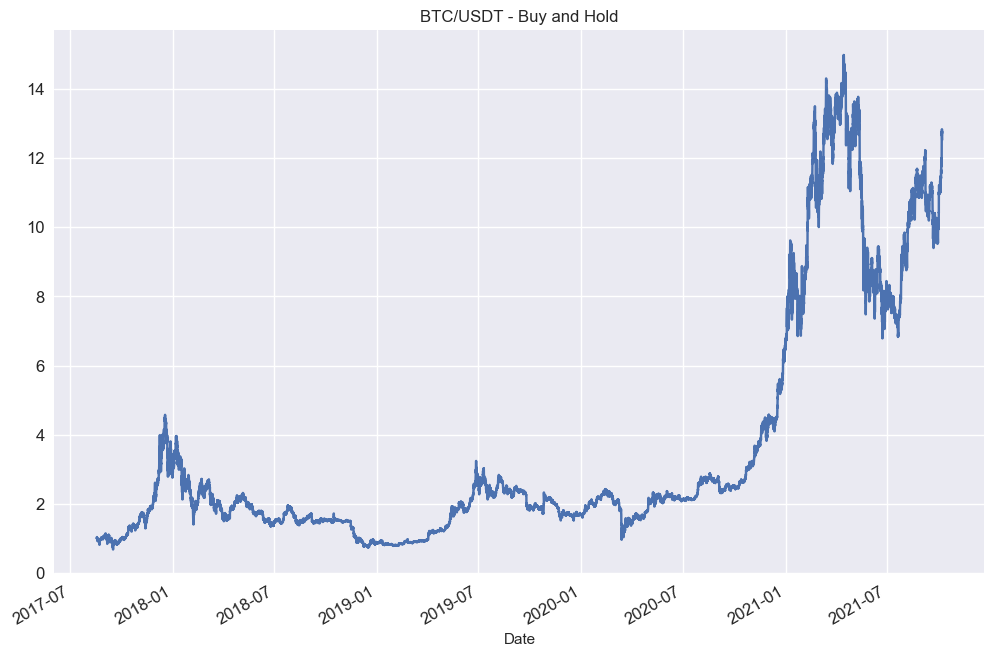

In [30]:
data.creturns.plot(figsize = (12,8), title = "BTC/USDT - Buy and Hold", fontsize = 12)
plt.show()

# Performance Measurement

In [31]:
#mean return and risk

In [33]:
#평균수익률
mu = data.returns.mean()
mu

6.990445168834005e-05

In [38]:
#시간당 수익률의 표준편차
std = data.returns.std()
std

0.009669001511177732

In [39]:
number_of_periods = 24 * 365.25
number_of_periods

8766.0

In [ ]:
#annualized mean reuturn and risk

In [41]:
#연평균 수익률
ann_mean = mu * number_of_periods
ann_mean

0.6127824234999889

In [46]:
#연 환산 위험성(연간 수익률의 표준편차)
ann_std = std * np.sqrt(number_of_periods)
ann_std

0.9052788232893756

In [44]:
#CARG

In [45]:
#연평균 성장률
cagr = np.exp(ann_mean) - 1
cagr

0.845559389167847

In [52]:
#Risk-adjusted Return(샤프비율)

In [50]:
ann_mean / ann_std

0.6768991030558006

In [51]:
cagr / ann_std

0.9340319992192736